# 1. Dataset Description

**Context**
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

**Content**
Attribute Information:

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. 

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

**Acknowledgements**
__Creators:__

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
__Donor:__
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.

# 2. Data Overview

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
real_features = [
    'age',
    'chol',
    'oldpeak',
    'thalach',
    'trestbps'
]
categorical_features = [
    'ca',
    'cp',
    'exang',
    'fbs',
    'restecg',
    'sex',
    'slope',
]

# 3 Real Features EDA

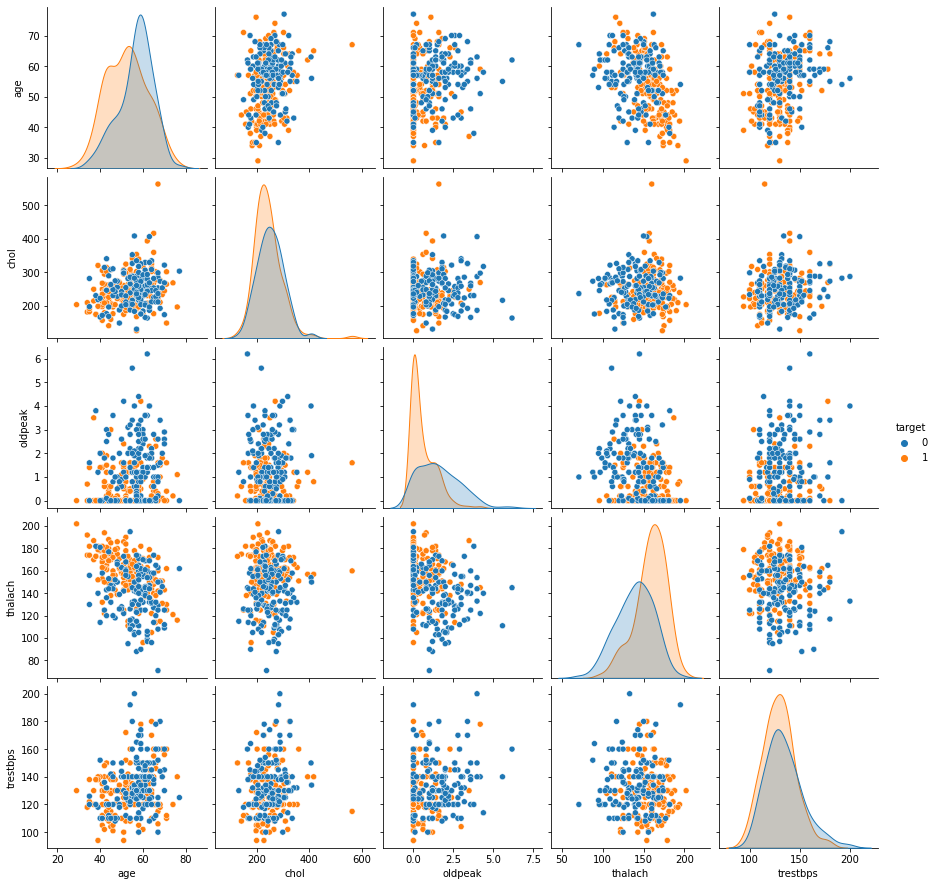

In [8]:
sns.pairplot(data[real_features + ['target']], hue='target')

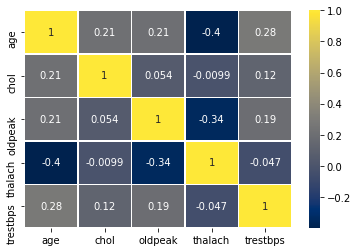

In [14]:
sns.heatmap(
    data[real_features].corr(),
    annot=True,
    linewidths=0.5,
    cmap='cividis',
)

# 4. Categorical Features EDA

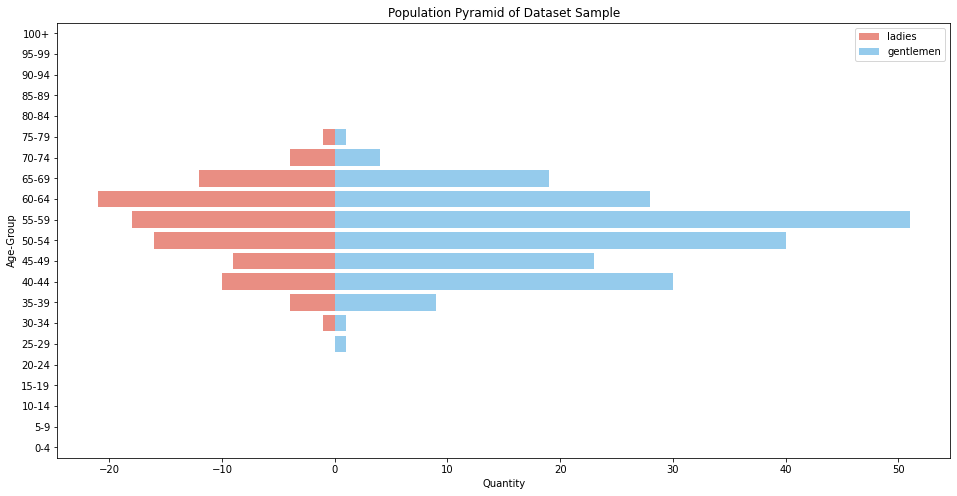

In [11]:
age_cohort = [
    '0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49',
    '50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+'
]
age_coh_vals = [
    tuple(map(int, coh.replace('+', '-1000').split('-', 1)))
    for coh in age_cohort
]
gentlemen = [
    data[(data.sex == 1) & (data.age.between(coh[0], coh[1]))]['age'].count()
    for coh in age_coh_vals
]
ladies = [
    data[(data.sex == 0) & (data.age.between(coh[0], coh[1]))]['age'].count() * (-1)
    for coh in age_coh_vals
]

df = pd.DataFrame({'age': age_cohort, 'ladies': ladies, 'gentlemen': gentlemen})

plt.figure(figsize=(16,8))
bar_plot = sns.barplot(x='ladies', y='age', label='ladies', data=df, order=age_cohort[::-1], color='Salmon')
bar_plot = sns.barplot(x='gentlemen', y='age', label='gentlemen', data=df, order=age_cohort[::-1], color='LightSKyBlue')
bar_plot.set(
    xlabel="Quantity",
    ylabel="Age-Group",
    title = "Population Pyramid of Dataset Sample",
    
)
plt.legend()
plt.show()

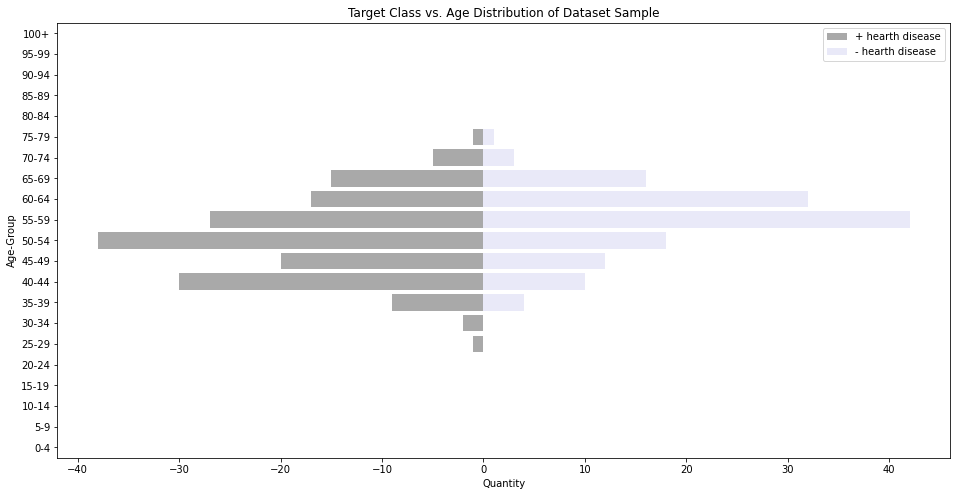

In [12]:
df['good'] = [
    data[(data.target == 0) & (data.age.between(coh[0], coh[1]))]['age'].count()
    for coh in age_coh_vals
]
df['bad'] = [
    data[(data.target == 1) & (data.age.between(coh[0], coh[1]))]['age'].count() * (-1)
    for coh in age_coh_vals
]

plt.figure(figsize=(16,8))
bar_plot = sns.barplot(x='bad', y='age', label='+ hearth disease', data=df, order=age_cohort[::-1], color='DarkGray')
bar_plot = sns.barplot(x='good', y='age', label='- hearth disease', data=df, order=age_cohort[::-1], color='Lavender')
bar_plot.set(
    xlabel="Quantity",
    ylabel="Age-Group",
    title = "Target Class vs. Age Distribution of Dataset Sample",
    
)
plt.legend()
plt.show()

# 5.Conclusion
Blah blah blah skewed data, needs preprocessing and so on.